### Project 1 - Movie Lens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions.

#### Domain 
Internet and Entertainment


#### 1. Import the necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # seaborn sits on top of matplotlb
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### 2. Read the 3 datasets into dataframes

In [2]:
data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data

In [3]:
print(data.info())
print()
print(data.shape)
print()
print(data.describe())
print()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None

(100000, 4)

            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

user id      0
movie id

In [4]:
print(item.info())
print()
print(item.shape)
print()
print(item.describe())
print()
print(item.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [5]:
print(user.info())
print()
print(user.shape)
print()
print(user.describe())
print()
print(user.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None

(943, 5)

          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


#### 4. Find the number of movies per genre using the item data

In [6]:
item[['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre

In [7]:
#hint: use sum on the axis = 1

In [8]:
item1 = item.drop('movie id', axis=1)
(item1[ np.sum(item1, axis=1)>1])['movie title']

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown

In [9]:
(item[item['unknown'] != 1])['movie title']

0                                Toy Story 
1                                GoldenEye 
2                               Four Rooms 
3                               Get Shorty 
4                                  Copycat 
                       ...                 
1676                            Mat' i syn 
1677                             B. Monkey 
1678                         Sliding Doors 
1679                          You So Crazy 
1680    Scream of Stone (Schrei aus Stein) 
Name: movie title, Length: 1680, dtype: object

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation'

In [10]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

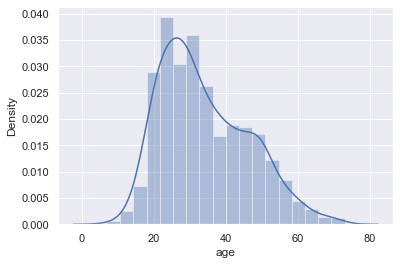

In [11]:
sns.distplot(user['age'], kde=True);

In [12]:
item['release year'] = item['release date'].str[-4:].astype('int')
item.head(1)

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995


In [13]:
item['release year'].nunique()

71

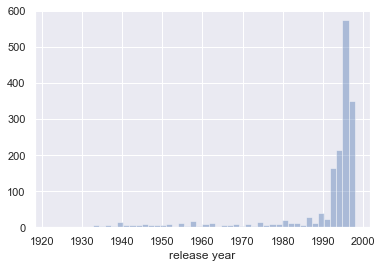

In [14]:
sns.distplot(item['release year'],kde=False)
plt.show()

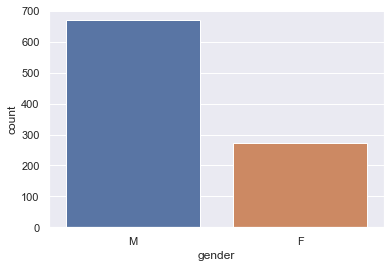

In [15]:
sns.countplot(user['gender']);

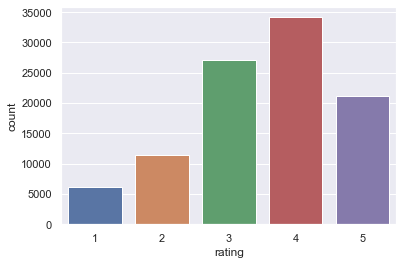

In [16]:
sns.countplot(data['rating']);

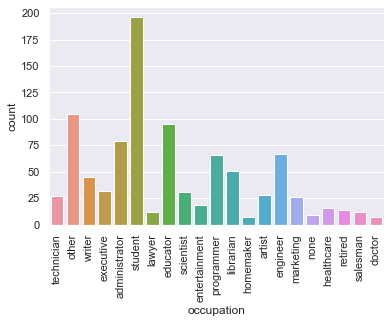

In [17]:
sns.countplot(user['occupation'])
plt.xticks(rotation=90)
plt.show()

### 8. Visualize how popularity of genres has changed over the years

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [18]:
genreByYear = item.groupby('release year')[['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum().T
genreByYear

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1


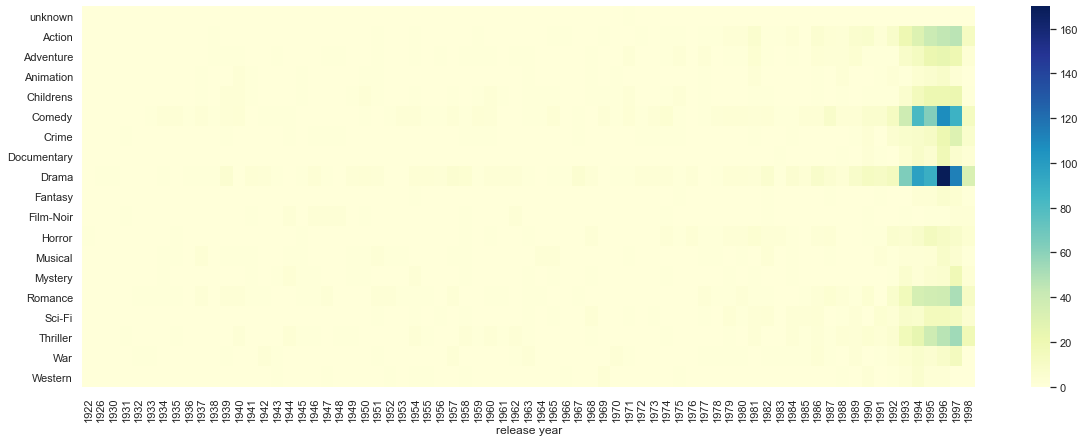

In [19]:
plt.figure(figsize=(20,7))
sns.heatmap(genreByYear, cmap='YlGnBu');

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [20]:
merged = pd.merge(item, data, on='movie id', how='inner')
grouped = merged.groupby(['movie title'], as_index=False)['rating'].count()
grouped.columns = ['movie title', 'count']
grouped1 = grouped[grouped['count']>100]
print(grouped1.shape)
grouped1.head()

(334, 2)


,movie title,count
2,101 Dalmatians,109
3,12 Angry Men,125
7,2001: A Space Odyssey,259
15,Absolute Power,127
16,"Abyss, The",151


In [21]:
grouped2 = merged.groupby([ 'movie title'], as_index=False)['rating'].sum()
print(grouped2.shape)
grouped2.head()

(1658, 2)


,movie title,rating
0,'Til There Was You,21
1,1-900,13
2,101 Dalmatians,317
3,12 Angry Men,543
4,187,124


In [22]:
final = pd.merge(grouped1, grouped2, on='movie title', how='inner')
final.head()

,movie title,count,rating
0,101 Dalmatians,109,317
1,12 Angry Men,125,543
2,2001: A Space Odyssey,259,1028
3,Absolute Power,127,428
4,"Abyss, The",151,542


In [23]:
final['average'] = final['rating']/final['count']
final.head()

,movie title,count,rating,average
0,101 Dalmatians,109,317,2.908257
1,12 Angry Men,125,543,4.344000
2,2001: A Space Odyssey,259,1028,3.969112
3,Absolute Power,127,428,3.370079
4,"Abyss, The",151,542,3.589404


In [24]:
finalSorted = final.sort_values(['average', 'movie title'],ascending=False)
finalSorted.head(25)

,movie title,count,rating,average
63,"Close Shave, A",112,503,4.491071
260,Schindler's List,298,1331,4.466443
331,"Wrong Trousers, The",118,527,4.466102
54,Casablanca,243,1083,4.456790
269,"Shawshank Redemption, The",283,1258,4.445230
248,Rear Window,209,917,4.387560
319,"Usual Suspects, The",267,1171,4.385768
291,Star Wars,583,2541,4.358491
1,12 Angry Men,125,543,4.344000
59,Citizen Kane,198,850,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.
2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

### Answers:

In [25]:
user_movie_merged = pd.merge(user,data,on='user id',how='inner')

In [26]:
user_movie_genre_merged = pd.merge(user_movie_merged,item,on='movie id',how='inner')

In [27]:
user_movie_genre_merged = user_movie_genre_merged.drop(columns = ['user id', 'age', 'occupation', 'zip code', 'movie id', 'rating', 'timestamp', 'release date', 'release year'], axis = 1)

In [28]:
user_movie_genre_merged.head(1)

,gender,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,M,Three Colors: White,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
groupedby = user_movie_genre_merged.groupby('gender').sum()
groupedby

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
gender,,,,,,,,,,,,,,,,,,,
F,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,1,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [30]:
groupedby.shape

(2, 19)

In [31]:
groupedby['total'] = groupedby.sum(axis = 1)

In [32]:
groupedby

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,,
F,0,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,1,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158885


In [33]:
groupedby.div(groupedby.total, axis = 0) * 100

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,,
F,0.000000,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.470960,4.076274,0.690862,100.0
M,0.000629,12.680240,6.679045,1.642698,3.115461,13.697958,3.940586,0.359379,18.181074,0.622463,0.848412,2.593070,2.210404,2.474116,8.561538,6.357428,10.564874,4.537244,0.933379,100.0


### Conclusion (Story telling):

#### Check validity of following statements:
#### Men watch more drama than women
#### Women watch more Sci-Fi than men
#### Men watch more Romance than women

#### Of all the women, 20.5% watched Drama and of all the men, 18.2% watched Drama
#### Of all the women, 4.9% watched Sci-Fi and of all the men, 6.4% watched Sci-Fi
#### Of all the women, 10.9% watched Romance and of all the men, 8.6% watched Romance
#### All the statements are false
